## Revenue growth for Healthcare

## Introduction

The healthcare revenue project is aimed at investigating the drivers of revenue for FMPF Medical Group across various clinics and hospitals in different locations. This project will involve data analysis and predictive modeling to provide insights and recommendations for the Financial Planning Team. 

### Business Goals

The business goal of this project is to help the medical group better understand their revenue drivers in order to make informed decisions and improve growth. The team also wants to predict revenue within 10% of actual values, though it is unclear if this is a realistic goal given the time frame. 

To achieve the project goals, the analysis will involve data validation and cleaning, exploratory analysis, model development, model evaluation, and defining metrics for the business to monitor. The final report and presentation will provide insights and recommendations based on the analysis.


### Project Overview 

Data is collected from various clinics and hospitals over the past year, with each clinic providing data from a random day in the year. The data includes patient numbers and ratios, satisfaction scores, ownership type, location type, admitted patients, nurse-patient ratios, emergency department visits, and revenue. 

    
### Data Dictonary

| Column Name           | Data Type | Allowed Values                                          |
| ---------------------| ---------| ------------------------------------------------------- |
| clinic_id             | Discrete  | Unique identifier for the clinic                        |
| ownership             | Categorical| Profit, Non-Profit, Public                              |
| hospital_location    | Categorical| Urban, Rural                                            |
| admitted_patients     | Discrete  | Any positive integer                                    |
| nurse_patient_ratio   | Continuous| Any value between 0.0 and 1.0                           |
| ed_visits             | Discrete  | Any positive integer                                    |
| satisfaction_score    | Continuous| Any value between 1 and 10                              |
| revenue               | Continuous| Any positive value to two decimal places                |




## Data Validation

The health revenue data set consists of 1990 rows and 8 columns. The data was collected over the past year from various clinics/hospitals across the country on a random date of each clinic in FMPF Medical Group.  

The original data set had 1990 rows and 8 columns. After validation, there were 1814 rows remaining

| Column Name           | Description                                                                                                                                                                        | Data Type    | Number of Rows | Number of Missing Values | Possible Values/Range                                        |
|-----------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------|----------------|--------------------------|--------------------------------------------------------------|
| clinic_id             | A unique identifier for each clinic                                                                                                                                              | Integer      | 1990           | 0                        | Positive integers                                            |
| ownership             | The ownership type of each medical facility                                                                                                                                      | Categorical  | 1990           | 0                        | Profit, Non-Profit, Public                                   |
| hospital_location     | The location type of each medical facility                                                                                                                                      | Categorical  | 1990           | 0                        | Urban, Rural                                                 |
| admitted_patients     | The number of patients admitted to each medical facility on a given day                                                                                                          | Discrete     | 1990           | 0                        | Positive integers                                            |
| nurse_patient_ratio   | The ratio of nurses to patients                                                                                                                                                  | Continuous   | 1990           | 0                        | Ranges from 0.0 to 1.0 inclusive                              |
| ed_visits              | The number of emergency department visits during a given day                                                                                                                     | Discrete     | 1990           | 0                       | Positive integers and some negative integers (filtering out negative integers is recommended)                             |
| satisfaction_score    | The satisfaction score given by patients about their experience                                                                                                                 | Continuous   | 1655           | 159                      | Ranges from 1 to 10 inclusive (missing values need to replace with median)                                  |
| revenue               | The daily revenue value generated by each medical facility                                                                                                                      | Continuous   | 1990           | 0                        | Positive values up to two decimal places                      |

In [307]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [308]:
# load data
df = pd.read_csv('./health_revenue.csv')
df.head()

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
0,1847,Profit,Urban,23,0.40,12,2.04,55684.18
1,422,Profit,Urban,22,0.60,11,2.77,117115.85
2,1843,Public,Rural,47,0.37,31,3.13,72794.56
3,14,Non-Profit,Urban,20,0.06,47,1.30,87447.23
4,1880,Public,Rural,33,0.94,40,5.90,88848.01


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1990 non-null   int64  
 1   ownership            1990 non-null   object 
 2   hospital_location    1990 non-null   object 
 3   admitted_patients    1990 non-null   int64  
 4   nurse_patient_ratio  1990 non-null   float64
 5   ed_visits            1990 non-null   int64  
 6   satisfaction_score   1831 non-null   float64
 7   revenue              1990 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 124.5+ KB


In [310]:
df.isna().sum()

clinic_id                0
ownership                0
hospital_location        0
admitted_patients        0
nurse_patient_ratio      0
ed_visits                0
satisfaction_score     159
revenue                  0
dtype: int64

In [311]:
#validate any negative values in numeric variables and nulls in count
df.describe()

,clinic_id,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
count,1990.000000,1990.000000,1990.000000,1990.000000,1831.000000,1990.000000
mean,997.214070,25.400503,0.503251,23.250251,4.515418,88076.974523
std,577.514303,14.144905,0.285727,16.373214,2.753724,29644.679778
min,0.000000,1.000000,0.000000,-49.000000,1.000000,16432.280000
25%,491.250000,14.000000,0.250000,11.000000,2.190000,65186.840000
50%,1003.000000,25.000000,0.500000,24.000000,3.440000,88086.915000
75%,1497.750000,38.000000,0.750000,36.000000,7.110000,110556.667500
max,1989.000000,49.000000,1.000000,49.000000,9.990000,156115.420000


#Satisfaction score contains missing values for 159 records which is 8% of the data.

#ed_visits contains negative values which is incorrect data.

There are several ways to handle this incorrect/missing values.
1) Deleting the missing values - When data is missing completely at Random and it is only small fraction we can delete the rows with missing values.
2) Imputation-mean Imputation if data is normally distributes,median imputation if the data is skewed,Mode for categorical data
3) backward or forward filling
4) Constant or Predictive Imputation

In [313]:
df['satisfaction_score']=df['satisfaction_score'].round(0)

<Axes: xlabel='satisfaction_score', ylabel='Count'>

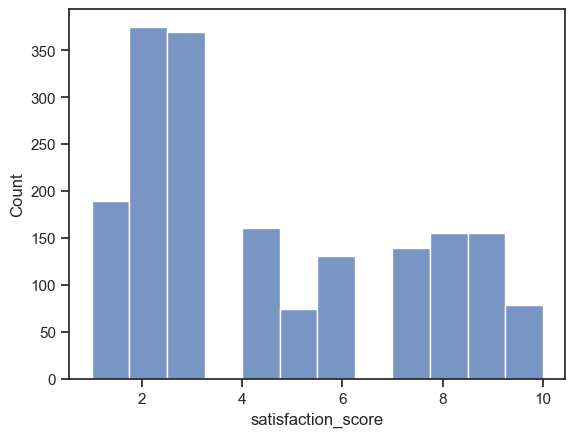

In [314]:
sns.histplot(data=df['satisfaction_score'])

In [315]:
#Since data is skewed for the SatisfactionScore we need to fill na awith median value
df['satisfaction_score']=df['satisfaction_score'].fillna(df['satisfaction_score'].median())

<Axes: xlabel='ed_visits', ylabel='Count'>

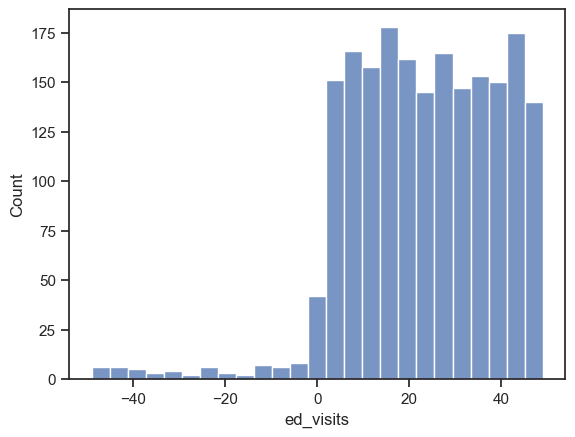

In [316]:
sns.histplot(df['ed_visits'])

In [317]:
df[df.ed_visits<0].count()
# filter out negative values of ed_visits since it is only 5% of the data
df = df[df['ed_visits']>=0]

In [318]:
#Drop the columns which are not needed for fitting a model
#df.drop('clinic_id',axis=1,inplace=True)

<Axes: xlabel='hospital_location', ylabel='ownership'>

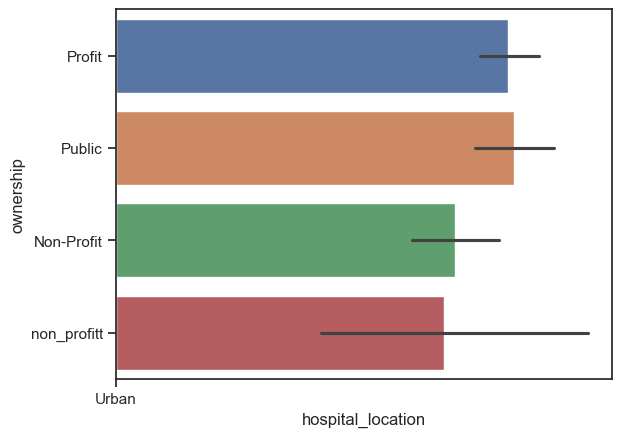

In [319]:
sns.barplot(y='ownership',x='hospital_location',data=df,hue='ownership',orient='y')

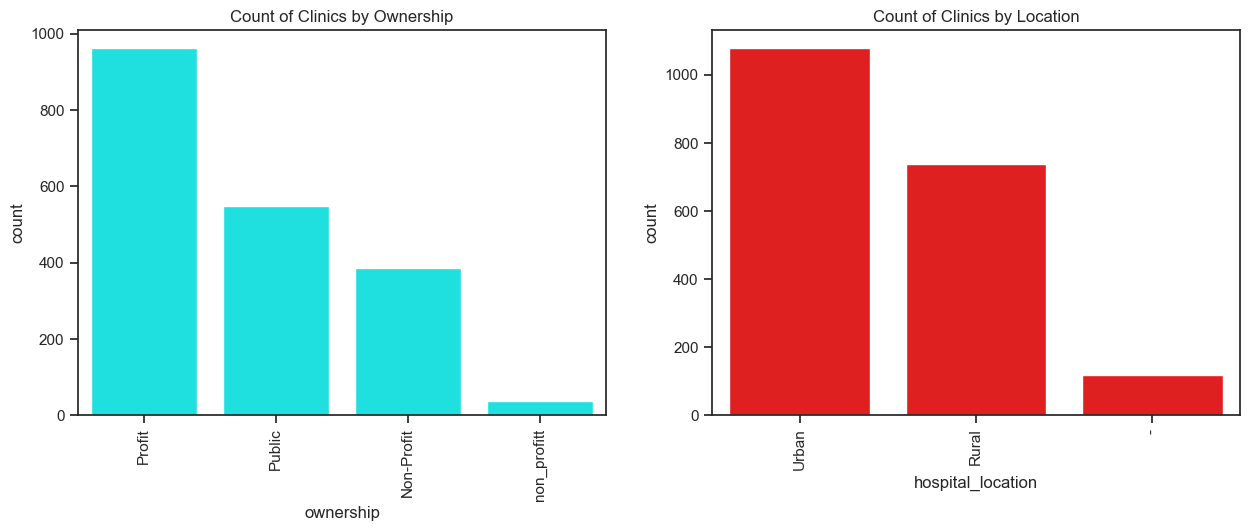

In [320]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['ownership'],color='cyan',ax=axes[0]).set(title='Count of Clinics by Ownership')
sns.countplot(x=df['hospital_location'],color='red',ax=axes[1]).set(title='Count of Clinics by Location')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [354]:
#From above plots we can observe that 
#For ownership, Non-Profit and non_profitt are assumed as 2 different values hence combine those values.
#For hospital_location few records has unknown categorical value ,replace it with the most occuring value ie.Urban
df['ownership'] = df['ownership'].replace('non_profitt','Non-Profit')
#df['hospital_location']=df['hospital_location'].replace('-',df['hospital_location'].mode()[0])
df=df[~(df['hospital_location']=='-')]

### Demonstrate the Relationship between Features:
- Bar chart showcasing the number of clinics based on their ownership type and location.
- Bar chart showcasing the revenue based on the ownership type and location of the clinics.
- Scatter plot detailing the correlation between satisfaction score and revenue, based on the ownership type and location of the hospitals.

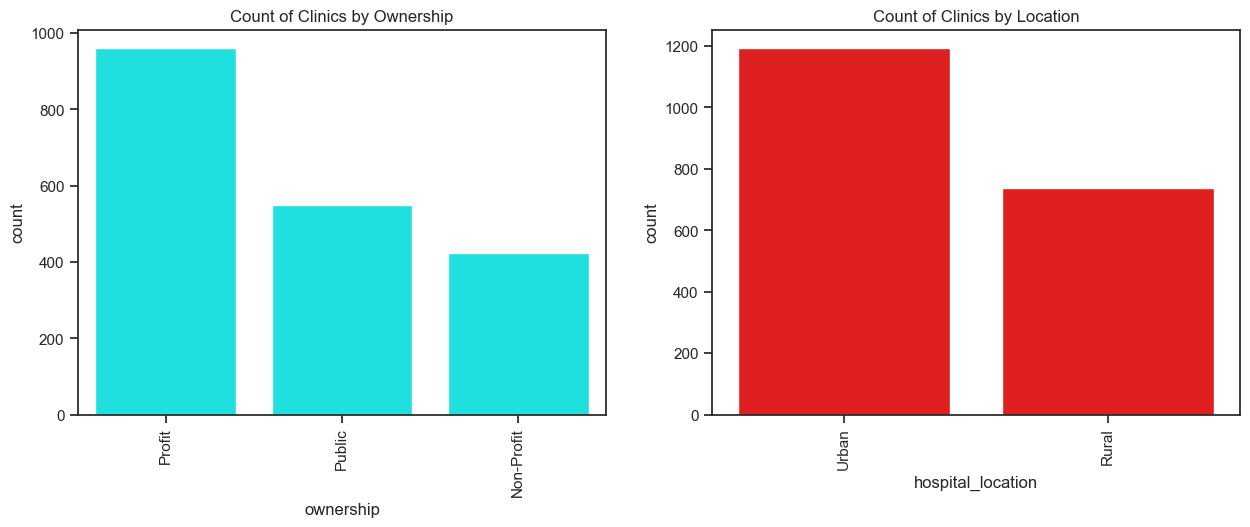

In [183]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['ownership'],color='cyan',ax=axes[0]).set(title='Count of Clinics by Ownership')
sns.countplot(x=df['hospital_location'],color='red',ax=axes[1]).set(title='Count of Clinics by Location')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

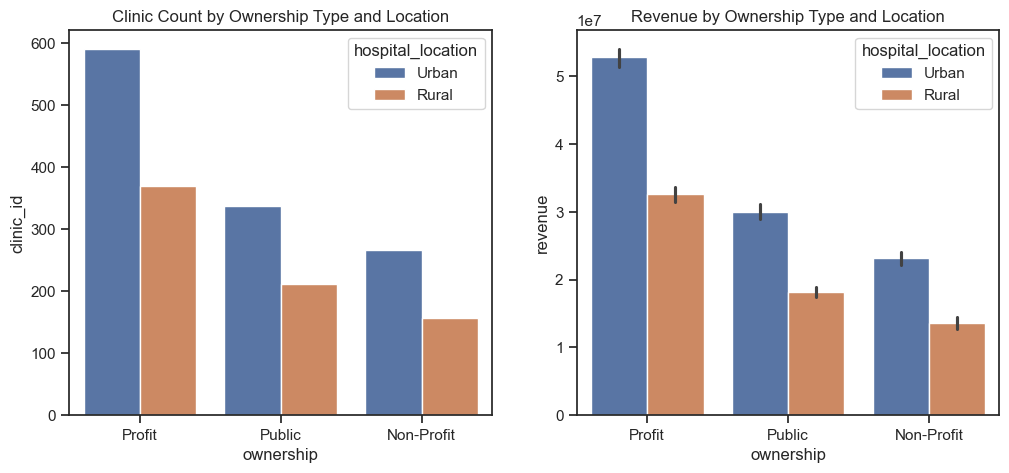

In [187]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
# Plot Clinic Count by Ownership Type and Location since those are categorical values
sns.barplot(x='ownership', y='clinic_id', hue='hospital_location',
            data=df, estimator=len, ax=axes[0]).set(title='Clinic Count by Ownership Type and Location')
# Plot Revenue by Ownership Type and Location
sns.barplot(x='ownership', y='revenue', hue='hospital_location',
            data=df, estimator=sum, ax=axes[1]).set(title='Revenue by Ownership Type and Location')
plt.show()


In [356]:
#Satisfaction score converting to integers for easy calculations
df['satisfaction_score']=df['satisfaction_score'].round()
df['satisfaction_score']=df['satisfaction_score'].astype(int)

In [364]:
df['ownership']=df['ownership'].map({'Profit':1,'Public':2,'Non-Profit':3})
df['hospital_location']=df['hospital_location'].map({'Urban':1,'Rural':2})

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1814 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1814 non-null   int64  
 1   ownership            1814 non-null   object 
 2   hospital_location    1814 non-null   object 
 3   admitted_patients    1814 non-null   int64  
 4   nurse_patient_ratio  1814 non-null   float64
 5   ed_visits            1814 non-null   int64  
 6   satisfaction_score   1814 non-null   float64
 7   revenue              1814 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 127.5+ KB


After numberic data validataion

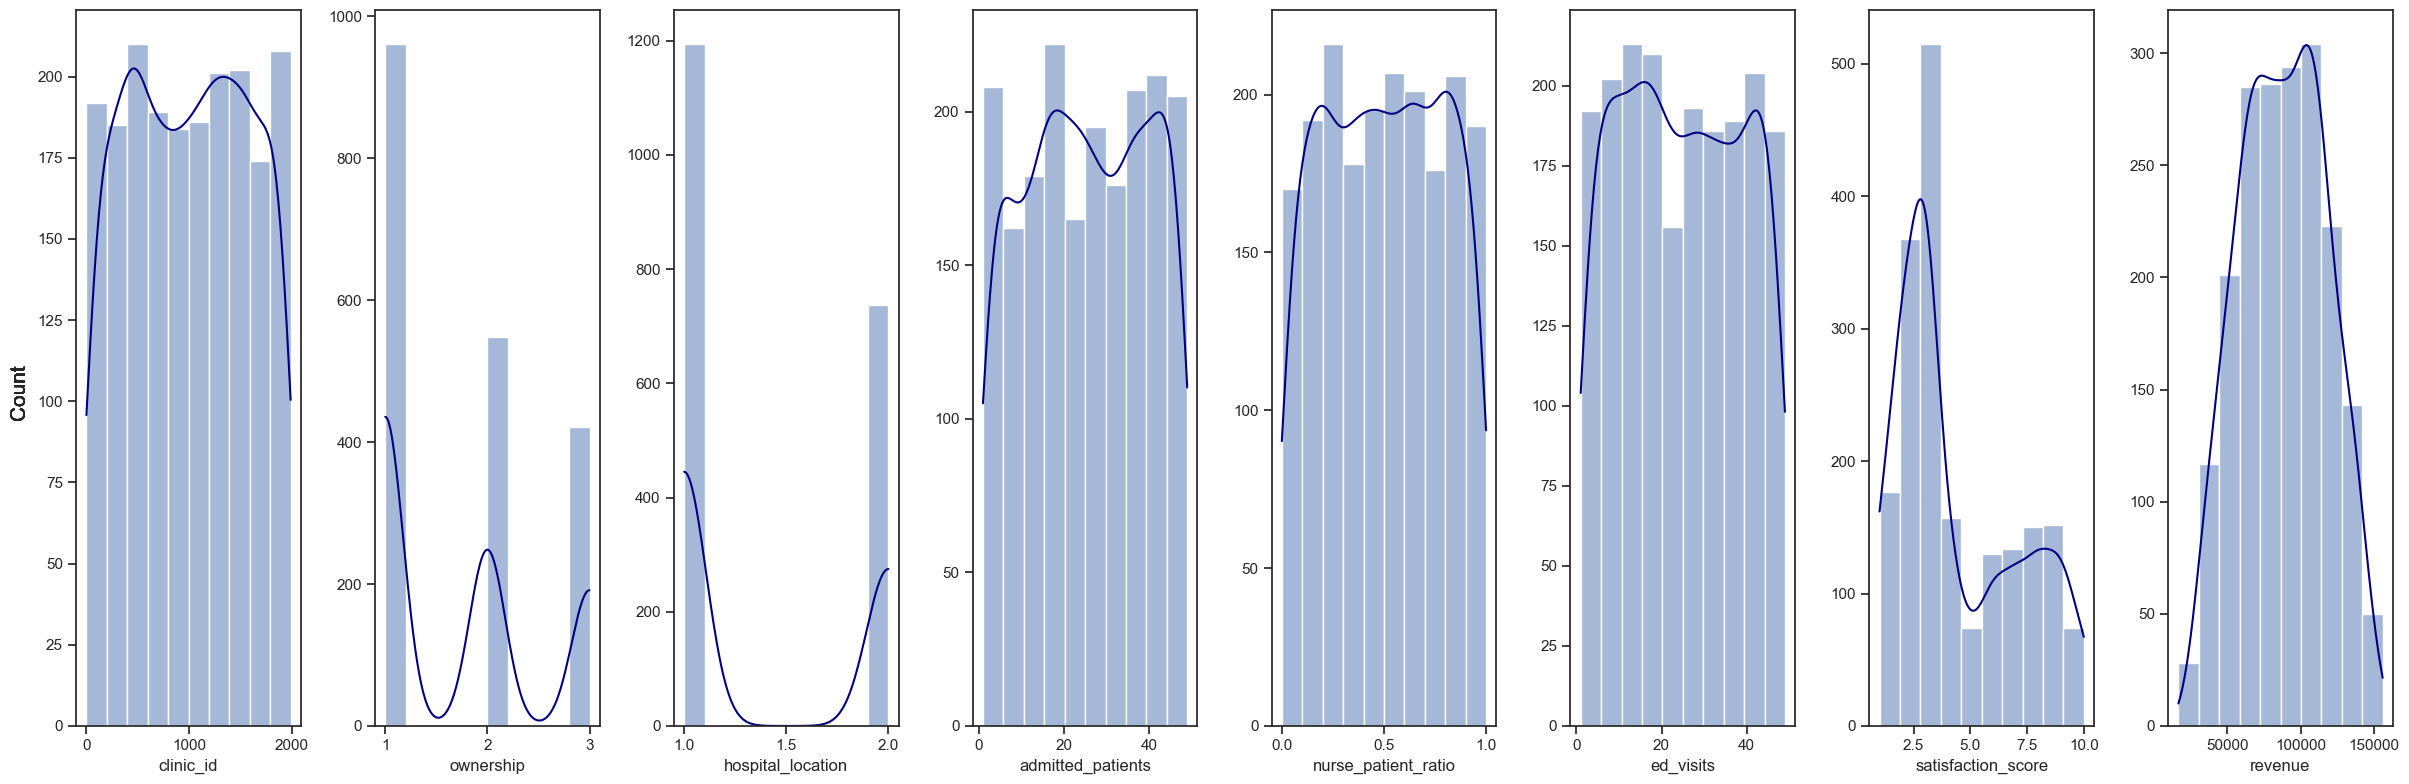

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
count,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000
mean,997.973071,1.720870,1.381668,25.398239,0.503237,24.701709,4.392543,88157.836354
std,575.736449,0.799141,0.485922,14.139988,0.286312,14.066942,2.688148,29718.609093
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,16432.000000
25%,492.500000,1.000000,1.000000,14.000000,0.250000,12.000000,2.000000,65138.500000
50%,1002.000000,2.000000,1.000000,25.000000,0.500000,24.000000,3.000000,88146.000000
75%,1496.500000,2.000000,2.000000,38.000000,0.750000,37.000000,7.000000,110914.000000
max,1989.000000,3.000000,2.000000,49.000000,1.000000,49.000000,10.000000,156115.000000


In [229]:
# EDA for numeric attributes
numeric = df.select_dtypes('number').columns
fig, axes = plt.subplots(1,8,figsize=(24,8))
axes = axes.flatten() 
for i, value in enumerate(numeric):
    ax = sns.histplot(x=df[value], ax=axes[i], bins=10, kde=True)
    ax.set_ylabel(None)
    ax.lines[0].set_color('navy')
    fig.text(0.0,0.5,'Count',rotation='vertical',horizontalalignment='center',verticalalignment='center',fontsize = 15)

plt.tight_layout()
plt.show()
df.describe()

In [366]:
df.shape

(1814, 8)

### After data validataion
- After the validation of data, the initial dataset was condensed from 1990 rows to 1931 rows.

In [368]:
corr = df.corr()
corr

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
clinic_id,1.000000,-0.010265,0.039904,0.029836,-0.046941,-0.006137,-0.036875,-0.005172
ownership,-0.010265,1.000000,-0.019713,-0.024892,-0.047748,-0.010739,-0.054030,-0.022332
hospital_location,0.039904,-0.019713,1.000000,0.016304,0.003687,-0.009682,0.022964,-0.030248
admitted_patients,0.029836,-0.024892,0.016304,1.000000,-0.011447,-0.038698,0.003139,-0.053740
nurse_patient_ratio,-0.046941,-0.047748,0.003687,-0.011447,1.000000,-0.002295,0.720546,0.125220
ed_visits,-0.006137,-0.010739,-0.009682,-0.038698,-0.002295,1.000000,-0.009180,0.451984
satisfaction_score,-0.036875,-0.054030,0.022964,0.003139,0.720546,-0.009180,1.000000,0.128423
revenue,-0.005172,-0.022332,-0.030248,-0.053740,0.125220,0.451984,0.128423,1.000000


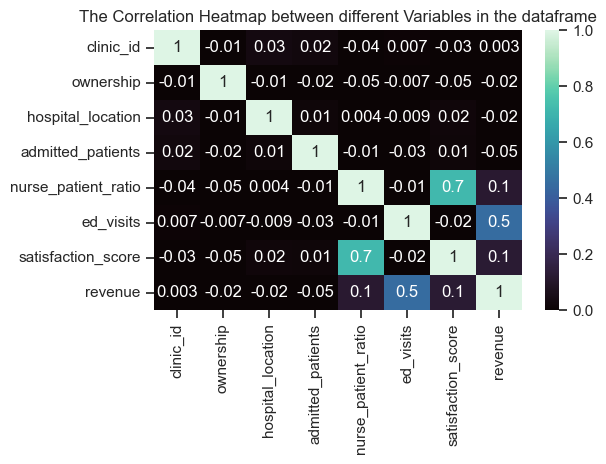

In [266]:

sns.heatmap(corr,annot=True,vmin=0,vmax=1,cmap="mako",fmt='.1g',).set(title='The Correlation Heatmap between different Variables in the dataframe')
plt.tight_layout()
plt.show()
# The data displays correlations between clinic variables. Nurse-patient ratio relates satisfaction score, while revenue relates to ED visits.

1. ### Illustrate the Characteristics of Data: 
- Plotting a boxplot for revenue

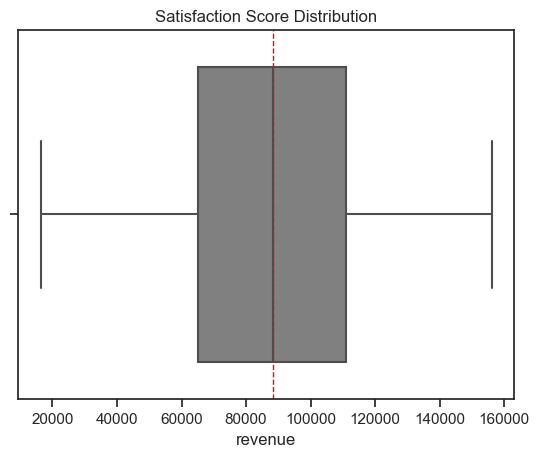

In [237]:

plt.show()
# Plotting a boxplot for revenue
sns.boxplot(x="revenue", data=df, color='gray').set(title='Satisfaction Score Distribution')
plt.axvline(df['revenue'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

Scatter plot of Satisfaction Score and Revenue by Ownership and Hospital Location.

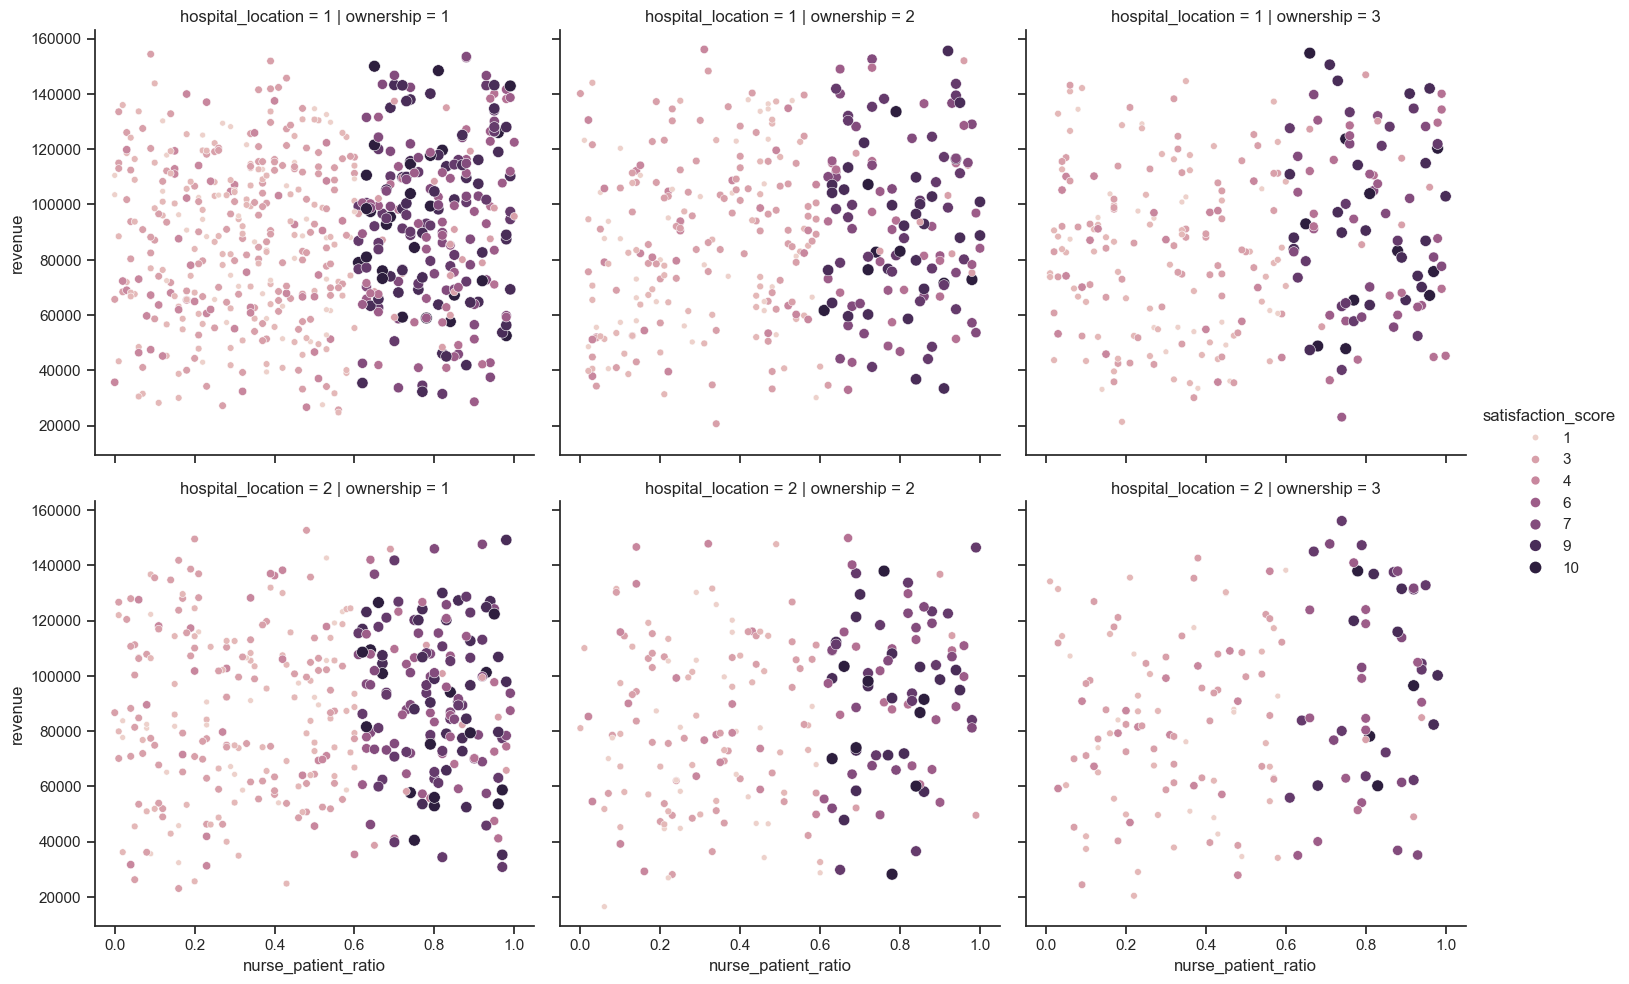

In [274]:
# Scatter plot of Satisfaction Score and Revenue by Ownership and Hospital Location.
sns.relplot(x="nurse_patient_ratio", y="revenue", 
            data=df,
            kind="scatter", 
            col="ownership",
            # col_order=["yes", "no"],
            row="hospital_location",
            hue="satisfaction_score",
            size="satisfaction_score")
# Show plot
plt.show()

3. ### Summarize your conclusions and insights from the analysis
- The data analysis indicates that clinics in urban areas, predominantly owned by profit, have a greater concentration compared to other areas. 
- The location and ownership type of clinics have a significant influence on their revenue generation. 
- The satisfaction score of patients appears to have a positive correlation with the revenue earned; however, the relationship is subject to the clinic's location and ownership type. 
- The urban areas with profit-owned clinics exhibit a higher nurse-patient ratio. 
- The analysis also reveals several correlations between the clinic variables, such as the relationship between nurse-patient ratio and satisfaction score and that between revenue and ED visits.

 ## Model Development/Business Focus 
- The aim is to predict revenue with in 10% using other variables in the dataset. 
- The problem type in the dataset is regression. 

### Prepare Data for Modelling
To enable modelling, we chose clinic_id, ownership, hospital_location, admitted_patients, nurse_patient_ratio, ed_visits, and satisfaction_score as features, revenue as target variables. also made the following changes:

- Normalize the numeric features
- Convert the categorical variables into numeric features
- Split the data into a training set and a test set

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split data into features and target
X = df.drop(['revenue'], axis=1)
feature_cols = X.columns
y = df['revenue']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Evaluation
- The problem is predicting the price, which is a regression problem in machine learning. 
- Linear Regression model is chosen for this problem because of the strong to moderate relationship between some features and the target variable. 
- Random forest regression model is selected for comparison as it can effectively model non-outliers, allowing for ease of interpretation.
- The evaluation metrics chosen for the models are R squared and RMSE (Root Mean Squared Error).
- R squared measures how well the model fits dependent variables while RMSE measures the deviation of predicted results from the actual number.


| Metric | Definition | Impact on Model |
|--------|------------|----------------|
| RMSE | Root Mean Squared Error, measures the average magnitude of the residuals (the difference between predicted and actual values) | The lower the RMSE, the better the model performance. A higher RMSE indicates a larger average magnitude of error, indicating a less accurate model. |
| R2 Score | Coefficient of determination, measures the proportion of variation in the dependent variable that is predictable from the independent variable(s) | A higher R2 score indicates a better fit between the predicted and actual values. It represents the percentage of the variance in the dependent variable explained by the independent variables. |

In [372]:

# Fitting a baseline model using linear regression
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Fitting a comparison model using random forest regression
from sklearn.ensemble import RandomForestRegressor

comparison_model = RandomForestRegressor()
comparison_model.fit(X_train, y_train)

# Evaluating the performance of each model on the test set
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
baseline_pred = baseline_model.predict(X_test)
comparison_pred = comparison_model.predict(X_test)


print('Linear regression model -'," RMSE : " + str(np.sqrt(mean_squared_error(y_test, baseline_pred))),' R^2  : '+ str(r2_score(y_test, baseline_pred)),sep='\n')
print('Random forest regression model -'," RMSE : " + str(np.sqrt(mean_squared_error(y_test, comparison_pred))),' R^2  : '+ str(r2_score(y_test, comparison_pred)),sep='\n')


'''with mode imputation for ownership
Linear regression model -
 RMSE : 27183.011012528787
 R^2  : 0.17040522463336027
Random forest regression model -
 RMSE : 28279.78443190638
 R^2  : 0.102110122635936'''

Linear regression model -
 RMSE : 25832.607603929337
 R^2  : 0.2503043897043087
Random forest regression model -
 RMSE : 26506.546659739186
 R^2  : 0.21067696955016757


'with mode imputation for ownership\nLinear regression model -\n RMSE : 27183.011012528787\n R^2  : 0.17040522463336027\nRandom forest regression model -\n RMSE : 28279.78443190638\n R^2  : 0.102110122635936'

### Models Result
The R squared of the linear regression model and the random forest regression model is 0.25 and 0.22, respectively, indicating that the Baseline model fits the features slightly better. The RMSE of the Baseline model and the Comparison model is 25617 and 26195, respectively, indicating that the Baseline model has less error in predicting values.

## Evaluate by Business Criteria/Metrics

The company's business objective is to accurately predict revenue within a 10% margin of error. To measure the effectiveness of our models in fulfilling this objective, we propose using the percentage of predictions that fall within the 10% margin as a key performance indicator.

However, given the low R-squared values of both models, they are currently unable to accurately predict even 50% of actual revenue within the desired range. Therefore, a comparison between the two models at this point is not recommended. However, we should explore the features used by these models and continue to improve our models to meet the business objective in the future.

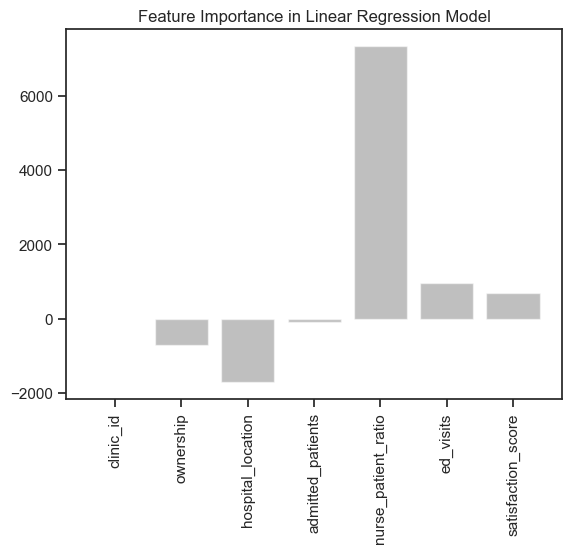

In [385]:
resultdict = {}
feature_cols =  X.columns
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = baseline_model.coef_[i]
    
plt.bar(resultdict.keys(),resultdict.values(), alpha=0.5,color='gray')
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Linear Regression Model');

In [387]:
X_test['Predicted_price'] = np.round((baseline_pred),0)
X_test['Price'] = np.round((y_test),0)
lr_e = X_test
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
pct = np.arange(0.05,0.25,0.05)
pct_lr = []
for p in pct:
    within_pct = len([d for d in lr_e['Diff'] if abs(d) <= p])
    pct_lr.append(within_pct/len(lr_e['Diff']) )      
    print(f'Margin of error in {int(p*100)}% range: {within_pct/len(lr_e["Diff"])}')

Margin of error in 5% range: 0.11294765840220386
Margin of error in 10% range: 0.18181818181818182
Margin of error in 15% range: 0.3002754820936639
Margin of error in 20% range: 0.4022038567493113


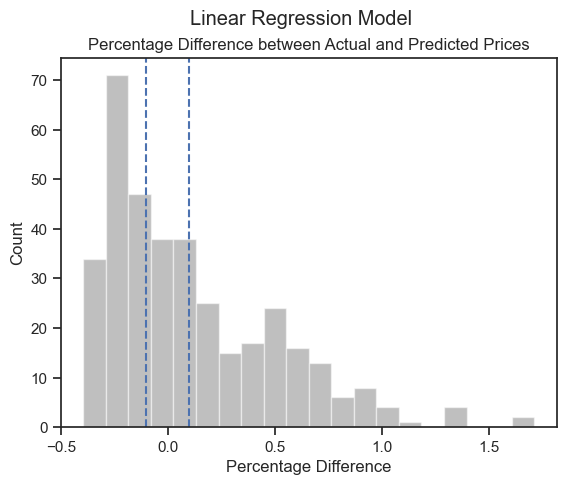

In [389]:
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
plt.hist(lr_e['Diff'], bins=20, color='gray',alpha=0.5)
plt.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
plt.axvline(x=-0.1, color='b', linestyle='--')
plt.title('Percentage Difference between Actual and Predicted Prices')
plt.suptitle('Linear Regression Model')
plt.xlabel('Percentage Difference')
plt.ylabel('Count');

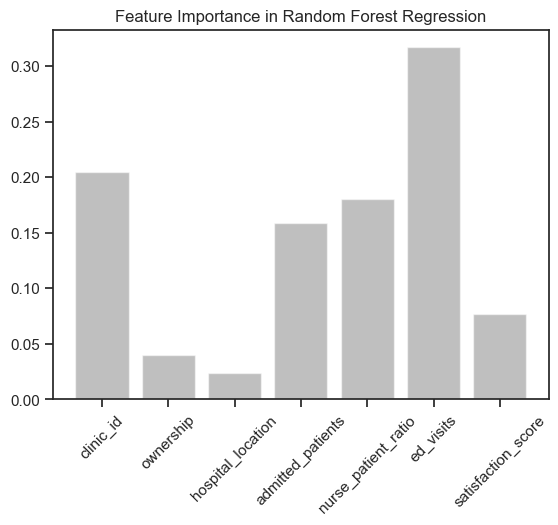

In [390]:
# Extracting important features from the trained Random Forest Regression model
importances = comparison_model.feature_importances_
f_importance = {}
for i in range(len(feature_cols)):
     f_importance[feature_cols[i]] = importances[i]
        
plt.bar(f_importance.keys(),f_importance.values(),alpha=0.5,color='gray')
plt.xticks(rotation=45)
plt.title('Feature Importance in Random Forest Regression')
plt.show()

In [391]:
X_test['Predicted_price'] = np.round((comparison_pred),0)
X_test['Price'] = np.round((y_test),0)
rf_e = X_test
rf_e['Diff'] = (rf_e['Predicted_price'] - rf_e['Price'])/rf_e['Price']

pct_e = []
for p in pct:
    within_pct = len([d for d in rf_e['Diff'] if abs(d) <= p])
    pct_e.append(within_pct/len(lr_e['Diff']) )      
    print(f' Margin of error in {int(p*100)}% range: {within_pct/len(lr_e["Diff"])}')

 Margin of error in 5% range: 0.11019283746556474
 Margin of error in 10% range: 0.18732782369146006
 Margin of error in 15% range: 0.3140495867768595
 Margin of error in 20% range: 0.4132231404958678


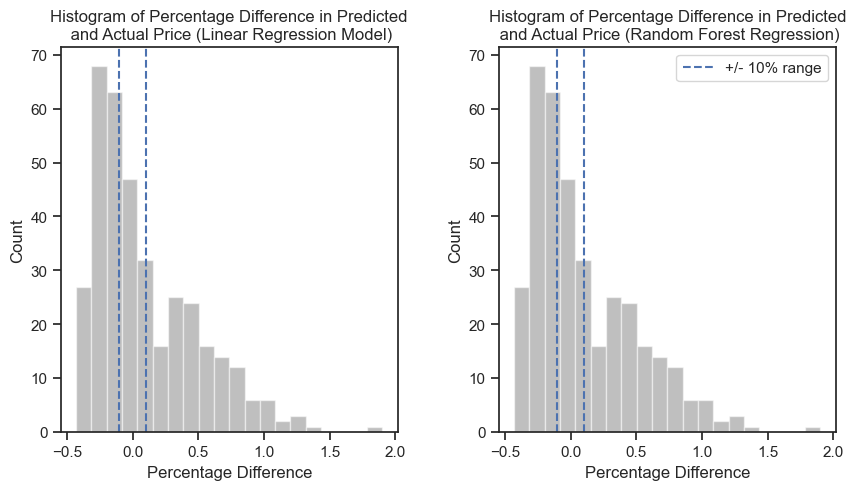

In [392]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Linear Regression Model
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
ax1.hist(lr_e['Diff'], bins=20, color='gray',alpha=0.5)
ax1.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
ax1.axvline(x=-0.1, color='b', linestyle='--')
ax1.set_title('Histogram of Percentage Difference in Predicted\n and Actual Price (Linear Regression Model)')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('Count')

# Random Forest Regression
rf_e['Diff'] = (rf_e['Predicted_price'] - rf_e['Price'])/rf_e['Price']
ax2.hist(rf_e['Diff'], bins=20, color='gray',alpha=0.5)
ax2.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
ax2.axvline(x=-0.1, color='b', linestyle='--')
ax2.set_title('Histogram of Percentage Difference in Predicted\n and Actual Price (Random Forest Regression)')
ax2.set_xlabel('Percentage Difference')
ax2.set_ylabel('Count')

plt.legend(loc='upper right')
plt.subplots_adjust(wspace=0.3)
plt.show()

### Summary of Models

Both models are performing similarly with a similar margin of error. But not matches businees requirement

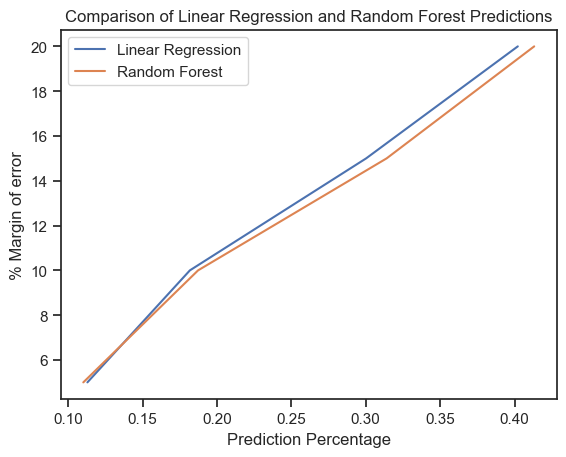

In [394]:
fig, ax = plt.subplots()
plt.title("Comparison of Linear Regression and Random Forest Predictions")
sns.lineplot(x=pct_lr, y=pct*100, label="Linear Regression", ax=ax)
sns.lineplot(x=pct_e, y=pct*100, label="Random Forest", ax=ax)
plt.xlabel("Prediction Percentage")
plt.ylabel("% Margin of error")
plt.show()

## Final Summary and Recommendations

we have analyzed healthcare revenue data using data science techniques and explored variables' relationships with revenue. Our findings indicate that location and ownership type of clinics have a significant influence on revenue generation. However, models' performance on predicting revenue within 10% margin fell short, with both models yielding a low R-squared value. Consequently, we suggest further analysis and improvements to our models to meet the business objective.

Recommendations:

1. Explore additional features that may help improve the model's performance, such as patient demographics, specialty, and insurance.

2. Consider applying more complex models that may capture non-linear relationships between features and revenue, such as deep learning models.

3. Focus on acquiring additional data to ensure data is more consistent across various clinics and hospitals.

4. Consider implementing strategies to improve patient satisfaction scores, as they play a vital role in clinic revenue.

5. Conduct further analysis on outliers and conduct feature engineering to address data distribution's deviation from normality.
